In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
start = '2020-05-27'
end = '2021-05-26'

df = data.DataReader('BTC-JPY', 'yahoo', start, end)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-26,9.909813e+05,9.497158e+05,9.500008e+05,9.897459e+05,3.529544e+12,9.897459e+05
2020-05-27,1.028178e+06,9.863712e+05,9.901692e+05,1.025430e+06,3.699552e+12,1.025430e+06
2020-05-28,1.030674e+06,1.005733e+06,1.025710e+06,1.017396e+06,3.545764e+12,1.017396e+06
2020-05-29,1.045949e+06,1.009593e+06,1.017373e+06,1.045559e+06,3.527045e+12,1.045559e+06
2020-05-30,1.045551e+06,1.015738e+06,1.045526e+06,1.019113e+06,2.991645e+12,1.019113e+06


In [9]:
data = df.index
close = df['Adj Close']

span01=5
span02=25
span03=50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['RSI'] = ta.RSI(close, timeperiod=span02)
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2021-05-21,4231225.50,3855582.75,4072133.75,4090178.50,6.252114e+12,4090178.50,4261705.00,5897978.690,-507514.123845,-343397.214812,-164116.909033,34.984411,7.121681e+06,5553276.78,3.984872e+06
2021-05-22,4172184.25,3402686.75,4089613.75,3787142.50,8.546716e+12,3787142.50,4084834.70,5846180.190,-549522.821771,-384622.336204,-164900.485567,32.964546,7.170928e+06,5466807.90,3.762688e+06
2021-05-23,4333207.00,3760060.75,3779494.25,4213300.50,7.332360e+12,4213300.50,4118895.25,5800378.260,-542177.740980,-416133.417159,-126044.323821,38.192083,7.167621e+06,5402043.16,3.636466e+06
2021-05-24,4327617.00,3982614.00,4223076.00,4177854.75,6.115407e+12,4177854.75,4066676.30,5753778.875,-533071.965535,-439521.126834,-93550.838701,37.935774,7.103875e+06,5316561.45,3.529248e+06
2021-05-27,4438528.50,4133943.00,4191446.00,4278327.00,5.569120e+12,4278327.00,4109360.65,5711574.785,-511848.036448,-453986.508757,-57861.527691,39.141700,7.017832e+06,5234869.13,3.451906e+06


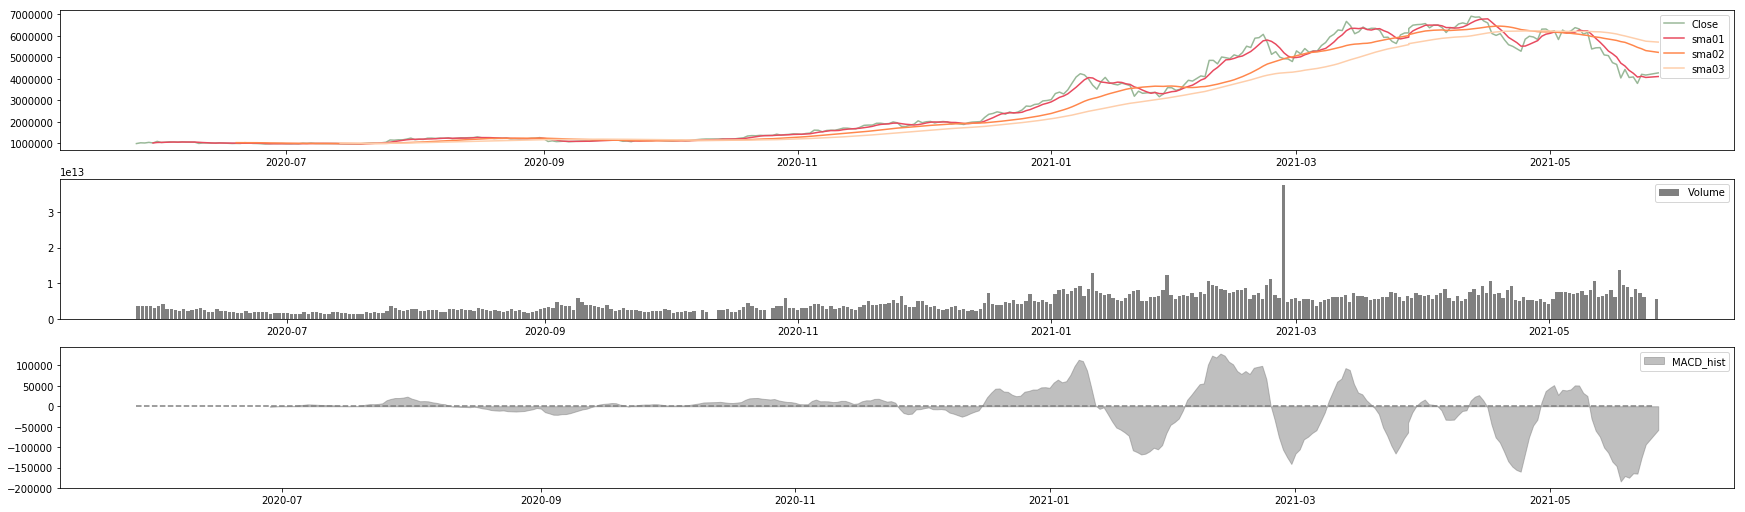

In [14]:
plt.figure(figsize=(30,15))
plt.subplot(5,1,1)

plt.plot(data,close,label='Close',color='#99b898')
plt.plot(data,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(data,df['sma02'],label='sma02',color='#ff874c')
plt.plot(data,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(data,df['Volume'],label='Volume',color='gray')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(data,df['macdhist'],color='gray',alpha=0.5,label='MACD_hist')
plt.hlines(0,start,end,'gray',linestyles='dashed')
plt.legend()